In [1]:
import tensorflow as tf


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
Test_g = ImageDataGenerator( rescale=1./255)
Test_gen = Test_g.flow_from_directory("G:\MSc project\Dataset 3\Testing",
                                       target_size = (150,150),
                                        color_mode = 'rgb',
                                       class_mode = 'sparse',
                            batch_size= 32
                                       )

Found 1311 images belonging to 4 classes.


In [7]:
import math
import numpy as np
number_of_examples = len(Test_gen.filenames)
number_of_generator_calls = math.ceil(number_of_examples / (1.0 * 32)) 
# 1.0 above is to skip integer division

test_labels = []
test_images = []

for i in range(0,int(number_of_generator_calls)):
    test_labels.extend(np.array(Test_gen[i][1]))
    test_images.extend(np.array(Test_gen[i][0]))

In [19]:
model_VGG16= tf.keras.models.load_model(r'G:\MSc project\VGG16.h5', compile=False)

In [4]:
model_xception= tf.keras.models.load_model(r"G:\MSc project\Xception.h5", compile = False)

In [14]:
model_res = tf.keras.models.load_model(r"G:\MSc project\ResNet152V2.h5", compile = False)

In [15]:
proposed_model =tf.keras.models.load_model(r"G:\MSc project\Mazeyarabv4.h5", compile = False)

In [8]:
test= np.array(test_images)

In [9]:
test_labels= np.array(test_labels) 

In [22]:
VGG16_pre = model_VGG16.predict(test)

41/41 [==============================] - 81s 2s/step


In [38]:
Xception_pre =np.argmax(model_xception.predict(test),1)

41/41 [==============================] - 30s 720ms/step


In [43]:
res_pre =np.argmax(model_res.predict(test),1)

41/41 [==============================] - 88s 2s/step


In [46]:
pr_model = np.argmax(proposed_model.predict(test),1)

41/41 [==============================] - 96s 2s/step


In [48]:
from sklearn.metrics import classification_report


In [51]:
print(classification_report(res_pre, test_labels, target_names=['glioma','meningioma','no tumor','pituitary']))

              precision    recall  f1-score   support

      glioma       0.87      0.96      0.91       273
  meningioma       0.92      0.86      0.89       325
    no tumor       0.98      0.97      0.98       407
   pituitary       0.97      0.95      0.96       306

    accuracy                           0.94      1311
   macro avg       0.93      0.94      0.94      1311
weighted avg       0.94      0.94      0.94      1311



In [52]:
print(classification_report(pr_model, test_labels, target_names=['glioma','meningioma','no tumor','pituitary']))

              precision    recall  f1-score   support

      glioma       0.91      0.94      0.92       293
  meningioma       0.85      0.92      0.88       281
    no tumor       1.00      0.93      0.96       433
   pituitary       0.99      0.98      0.98       304

    accuracy                           0.94      1311
   macro avg       0.94      0.94      0.94      1311
weighted avg       0.94      0.94      0.94      1311



In [53]:
print(classification_report(Xception_pre, test_labels, target_names=['glioma','meningioma','no tumor','pituitary']))

              precision    recall  f1-score   support

      glioma       0.83      0.94      0.88       264
  meningioma       0.89      0.82      0.86       331
    no tumor       0.99      0.97      0.98       415
   pituitary       0.95      0.95      0.95       301

    accuracy                           0.92      1311
   macro avg       0.92      0.92      0.92      1311
weighted avg       0.92      0.92      0.92      1311



In [54]:
print(classification_report( np.argmax(VGG16_pre,axis = 1), test_labels, target_names=['glioma','meningioma','no tumor','pituitary']))

              precision    recall  f1-score   support

      glioma       0.72      0.99      0.84       219
  meningioma       0.82      0.75      0.78       337
    no tumor       0.98      0.92      0.95       431
   pituitary       0.98      0.91      0.95       324

    accuracy                           0.89      1311
   macro avg       0.88      0.89      0.88      1311
weighted avg       0.90      0.89      0.89      1311



In [55]:
proposed_res = tf.keras.models.load_model(r"G:\MSc project\Mazemorelayerseperable+res20ep.h5")
proposed_res_pr =np.argmax(proposed_res.predict(test),1)
print(classification_report( proposed_res_pr, test_labels, target_names=['glioma','meningioma','no tumor','pituitary']))

41/41 [==============================] - 177s 4s/step
              precision    recall  f1-score   support

      glioma       0.95      0.96      0.95       296
  meningioma       0.93      0.94      0.94       303
    no tumor       1.00      0.98      0.99       410
   pituitary       0.99      0.98      0.99       302

    accuracy                           0.97      1311
   macro avg       0.97      0.97      0.97      1311
weighted avg       0.97      0.97      0.97      1311



In [56]:
proposed_res = tf.keras.models.load_model(r"G:\MSc project\Mazemorelayerv2.h5")
proposed_res_pr =np.argmax(proposed_res.predict(test),1)
print(classification_report( proposed_res_pr, test_labels, target_names=['glioma','meningioma','no tumor','pituitary']))

41/41 [==============================] - 229s 6s/step
              precision    recall  f1-score   support

      glioma       0.91      0.96      0.93       284
  meningioma       0.95      0.89      0.92       327
    no tumor       0.98      0.99      0.99       399
   pituitary       0.98      0.97      0.98       301

    accuracy                           0.95      1311
   macro avg       0.95      0.95      0.95      1311
weighted avg       0.96      0.95      0.95      1311



In [57]:
proposed_res = tf.keras.models.load_model(r"G:\MSc project\Mazemorelayer.h5")
proposed_res_pr =np.argmax(proposed_res.predict(test),1)
print(classification_report( proposed_res_pr, test_labels, target_names=['glioma','meningioma','no tumor','pituitary']))

41/41 [==============================] - 218s 5s/step
              precision    recall  f1-score   support

      glioma       0.89      0.96      0.92       278
  meningioma       0.94      0.87      0.91       331
    no tumor       0.98      0.99      0.99       401
   pituitary       0.98      0.97      0.98       301

    accuracy                           0.95      1311
   macro avg       0.95      0.95      0.95      1311
weighted avg       0.95      0.95      0.95      1311



In [2]:
model = tf.keras.models.load_model(r"G:\MSc project\InceptionResNet.h5", compile = False)

In [10]:
proposed_res_pr =np.argmax(model.predict(test),1)
print(classification_report( proposed_res_pr, test_labels, target_names=['glioma','meningioma','no tumor','pituitary']))

41/41 [==============================] - 16s 131ms/step
              precision    recall  f1-score   support

      glioma       0.86      0.97      0.91       267
  meningioma       0.83      0.89      0.86       284
    no tumor       0.99      0.92      0.96       435
   pituitary       0.99      0.91      0.95       325

    accuracy                           0.92      1311
   macro avg       0.92      0.92      0.92      1311
weighted avg       0.93      0.92      0.92      1311



In [4]:
import numpy as np
from sklearn.metrics import classification_report

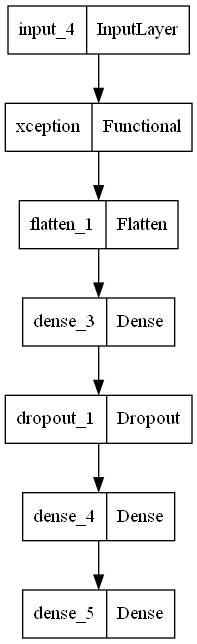

In [5]:
tf.keras.utils.plot_model(model_xception)

In [3]:
proposed_res = tf.keras.models.load_model(r"G:\MSc project\Mazemorelayerseperable+res20ep.h5")


In [22]:
model_VGG16= tf.keras.models.load_model(r'G:\MSc project\VGG16.h5', compile=False)
import tensorflow as tf
from tensorflow.python.profiler.model_analyzer import profile
from tensorflow.python.profiler.option_builder import ProfileOptionBuilder
print('TensorFlow:', tf.__version__)

model = model_VGG16

forward_pass = tf.function(
    model.call,
    input_signature=[tf.TensorSpec(shape=(1,) + model.input_shape[1:])])

graph_info = profile(forward_pass.get_concrete_function().graph,
                        options=ProfileOptionBuilder.float_operation())

# The //2 is necessary since `profile` counts multiply and accumulate
# as two flops, here we report the total number of multiply accumulate ops
flops = graph_info.total_float_ops // 2
print('Flops: {:,}'.format(flops))

TensorFlow: 2.10.1
Flops: 6,620,889,356


In [23]:
model_xception= tf.keras.models.load_model(r"G:\MSc project\Xception.h5", compile = False)
import tensorflow as tf
from tensorflow.python.profiler.model_analyzer import profile
from tensorflow.python.profiler.option_builder import ProfileOptionBuilder
print('TensorFlow:', tf.__version__)

model = model_xception

forward_pass = tf.function(
    model.call,
    input_signature=[tf.TensorSpec(shape=(1,) + model.input_shape[1:])])

graph_info = profile(forward_pass.get_concrete_function().graph,
                        options=ProfileOptionBuilder.float_operation())

# The //2 is necessary since `profile` counts multiply and accumulate
# as two flops, here we report the total number of multiply accumulate ops
flops = graph_info.total_float_ops // 2
print('Flops: {:,}'.format(flops))

TensorFlow: 2.10.1
Flops: 1,932,468,392


In [25]:
model_res = tf.keras.models.load_model(r"G:\MSc project\ResNet152V2.h5", compile = False)
import tensorflow as tf
from tensorflow.python.profiler.model_analyzer import profile
from tensorflow.python.profiler.option_builder import ProfileOptionBuilder
print('TensorFlow:', tf.__version__)

model = model_res

forward_pass = tf.function(
    model.call,
    input_signature=[tf.TensorSpec(shape=(1,) + model.input_shape[1:])])

graph_info = profile(forward_pass.get_concrete_function().graph,
                        options=ProfileOptionBuilder.float_operation())

# The //2 is necessary since `profile` counts multiply and accumulate
# as two flops, here we report the total number of multiply accumulate ops
flops = graph_info.total_float_ops // 2
print('Flops: {:,}'.format(flops))

TensorFlow: 2.10.1
Flops: 5,457,456,108


In [26]:
proposed_model =tf.keras.models.load_model(r"G:\MSc project\Mazeyarabv4.h5", compile = False)
import tensorflow as tf
from tensorflow.python.profiler.model_analyzer import profile
from tensorflow.python.profiler.option_builder import ProfileOptionBuilder
print('TensorFlow:', tf.__version__)

model = proposed_model

forward_pass = tf.function(
    model.call,
    input_signature=[tf.TensorSpec(shape=(1,) + model.input_shape[1:])])

graph_info = profile(forward_pass.get_concrete_function().graph,
                        options=ProfileOptionBuilder.float_operation())

# The //2 is necessary since `profile` counts multiply and accumulate
# as two flops, here we report the total number of multiply accumulate ops
flops = graph_info.total_float_ops // 2
print('Flops: {:,}'.format(flops))

TensorFlow: 2.10.1
Flops: 5,345,464,312


In [28]:
proposed_res = tf.keras.models.load_model(r"G:\MSc project\Mazemorelayerseperable+res20ep.h5")
import tensorflow as tf
from tensorflow.python.profiler.model_analyzer import profile
from tensorflow.python.profiler.option_builder import ProfileOptionBuilder
print('TensorFlow:', tf.__version__)

model = proposed_res

forward_pass = tf.function(
    model.call,
    input_signature=[tf.TensorSpec(shape=(1,) + model.input_shape[1:])])

graph_info = profile(forward_pass.get_concrete_function().graph,
                        options=ProfileOptionBuilder.float_operation())

# The //2 is necessary since `profile` counts multiply and accumulate
# as two flops, here we report the total number of multiply accumulate ops
flops = graph_info.total_float_ops // 2
print('Flops: {:,}'.format(flops))

TensorFlow: 2.10.1
Flops: 9,338,358,520


In [29]:
proposed_model =tf.keras.models.load_model(r"G:\MSc project\segmentation_mymodel_test.h5", compile = False)
import tensorflow as tf
from tensorflow.python.profiler.model_analyzer import profile
from tensorflow.python.profiler.option_builder import ProfileOptionBuilder
print('TensorFlow:', tf.__version__)

model = proposed_model

forward_pass = tf.function(
    model.call,
    input_signature=[tf.TensorSpec(shape=(1,) + model.input_shape[1:])])

graph_info = profile(forward_pass.get_concrete_function().graph,
                        options=ProfileOptionBuilder.float_operation())

# The //2 is necessary since `profile` counts multiply and accumulate
# as two flops, here we report the total number of multiply accumulate ops
flops = graph_info.total_float_ops // 2
print('Flops: {:,}'.format(flops))

TensorFlow: 2.10.1
Flops: 5,672,909,760


In [1]:
import tensorflow as tf
proposed_res = tf.keras.models.load_model(r"G:\MSc project\Mazemorelayerv2.h5", compile = False)
import tensorflow as tf
from tensorflow.python.profiler.model_analyzer import profile
from tensorflow.python.profiler.option_builder import ProfileOptionBuilder
print('TensorFlow:', tf.__version__)

model = proposed_res

forward_pass = tf.function(
    model.call,
    input_signature=[tf.TensorSpec(shape=(1,) + model.input_shape[1:])])

graph_info = profile(forward_pass.get_concrete_function().graph,
                        options=ProfileOptionBuilder.float_operation())

# The //2 is necessary since `profile` counts multiply and accumulate
# as two flops, here we report the total number of multiply accumulate ops
flops = graph_info.total_float_ops // 2
print('Flops: {:,}'.format(flops))

TensorFlow: 2.10.1
Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`
Flops: 10,791,179,192


In [4]:
import tensorflow as tf
proposed_res = tf.keras.models.load_model(r"G:\MSc project\Mazemorelayer.h5", compile = False)
import tensorflow as tf
from tensorflow.python.profiler.model_analyzer import profile
from tensorflow.python.profiler.option_builder import ProfileOptionBuilder
print('TensorFlow:', tf.__version__)

model = proposed_res

forward_pass = tf.function(
    model.call,
    input_signature=[tf.TensorSpec(shape=(1,) + model.input_shape[1:])])

graph_info = profile(forward_pass.get_concrete_function().graph,
                        options=ProfileOptionBuilder.float_operation())

# The //2 is necessary since `profile` counts multiply and accumulate
# as two flops, here we report the total number of multiply accumulate ops
flops = graph_info.total_float_ops // 2
print('Flops: {:,}'.format(flops))

TensorFlow: 2.10.1
Flops: 10,780,518,392


In [2]:
proposed_res = tf.keras.models.load_model(r"G:\MSc project\Mazemorelayerseperable+res20ep.h5")
import tensorflow as tf
from tensorflow.python.profiler.model_analyzer import profile
from tensorflow.python.profiler.option_builder import ProfileOptionBuilder
print('TensorFlow:', tf.__version__)

model = proposed_res

forward_pass = tf.function(
    model.call,
    input_signature=[tf.TensorSpec(shape=(1,) + model.input_shape[1:])])

graph_info = profile(forward_pass.get_concrete_function().graph,
                        options=ProfileOptionBuilder.float_operation())

# The //2 is necessary since `profile` counts multiply and accumulate
# as two flops, here we report the total number of multiply accumulate ops
flops = graph_info.total_float_ops // 2
print('Flops: {:,}'.format(flops))

TensorFlow: 2.10.1
Flops: 9,338,358,520


In [3]:
model = tf.keras.models.load_model(r"G:\MSc project\InceptionResNet.h5", compile = False)
import tensorflow as tf
from tensorflow.python.profiler.model_analyzer import profile
from tensorflow.python.profiler.option_builder import ProfileOptionBuilder
print('TensorFlow:', tf.__version__)

model = model

forward_pass = tf.function(
    model.call,
    input_signature=[tf.TensorSpec(shape=(1,) + model.input_shape[1:])])

graph_info = profile(forward_pass.get_concrete_function().graph,
                        options=ProfileOptionBuilder.float_operation())

# The //2 is necessary since `profile` counts multiply and accumulate
# as two flops, here we report the total number of multiply accumulate ops
flops = graph_info.total_float_ops // 2
print('Flops: {:,}'.format(flops))

TensorFlow: 2.10.1
Flops: 2,369,154,604
